In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/media/walml/beta/galaxy_zoo/gz2/subjects/gz2_hart16.csv')

In [3]:
df

,dr7objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,342,0,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,332,1,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,125,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,218,1,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,151,33,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239690,587741490371625059,167.542648,28.991867,11:10:10.23,+28:59:30.7,extra,Ec,42,135,34,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
239691,587731174917669027,316.108826,1.214799,21:04:26.12,+01:12:53.3,stripe82,Ei(i),46,186,25,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
239692,587731512070177108,21.690212,-0.546427,01:26:45.65,+00:32:47.1,stripe82,Ei,48,164,36,...,0.000,0.000,0.000000,0,2,2.0,1.000,1.000,1.000000,1
239693,587731513145688256,25.747143,0.360079,01:42:59.31,+00:21:36.3,stripe82,Ei(i),48,204,25,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0


In [15]:
fraction_cols = [x for x in df.columns.values if 'fraction' in x and 'weighted' not in x and 'odd_feature' not in x]
weighted_cols = [x for x in df.columns.values if 'weighted' in x and 'odd_feature' not in x]

In [16]:
fraction_cols

['t01_smooth_or_features_a01_smooth_fraction',
 't01_smooth_or_features_a02_features_or_disk_fraction',
 't01_smooth_or_features_a03_star_or_artifact_fraction',
 't02_edgeon_a04_yes_fraction',
 't02_edgeon_a05_no_fraction',
 't03_bar_a06_bar_fraction',
 't03_bar_a07_no_bar_fraction',
 't04_spiral_a08_spiral_fraction',
 't04_spiral_a09_no_spiral_fraction',
 't05_bulge_prominence_a10_no_bulge_fraction',
 't05_bulge_prominence_a11_just_noticeable_fraction',
 't05_bulge_prominence_a12_obvious_fraction',
 't05_bulge_prominence_a13_dominant_fraction',
 't06_odd_a14_yes_fraction',
 't06_odd_a15_no_fraction',
 't07_rounded_a16_completely_round_fraction',
 't07_rounded_a17_in_between_fraction',
 't07_rounded_a18_cigar_shaped_fraction',
 't09_bulge_shape_a25_rounded_fraction',
 't09_bulge_shape_a26_boxy_fraction',
 't09_bulge_shape_a27_no_bulge_fraction',
 't10_arms_winding_a28_tight_fraction',
 't10_arms_winding_a29_medium_fraction',
 't10_arms_winding_a30_loose_fraction',
 't11_arms_number_a31

In [17]:
weighted_cols

['t01_smooth_or_features_a01_smooth_weighted_fraction',
 't01_smooth_or_features_a02_features_or_disk_weighted_fraction',
 't01_smooth_or_features_a03_star_or_artifact_weighted_fraction',
 't02_edgeon_a04_yes_weighted_fraction',
 't02_edgeon_a05_no_weighted_fraction',
 't03_bar_a06_bar_weighted_fraction',
 't03_bar_a07_no_bar_weighted_fraction',
 't04_spiral_a08_spiral_weighted_fraction',
 't04_spiral_a09_no_spiral_weighted_fraction',
 't05_bulge_prominence_a10_no_bulge_weighted_fraction',
 't05_bulge_prominence_a11_just_noticeable_weighted_fraction',
 't05_bulge_prominence_a12_obvious_weighted_fraction',
 't05_bulge_prominence_a13_dominant_weighted_fraction',
 't06_odd_a14_yes_weighted_fraction',
 't06_odd_a15_no_weighted_fraction',
 't07_rounded_a16_completely_round_weighted_fraction',
 't07_rounded_a17_in_between_weighted_fraction',
 't07_rounded_a18_cigar_shaped_weighted_fraction',
 't09_bulge_shape_a25_rounded_weighted_fraction',
 't09_bulge_shape_a26_boxy_weighted_fraction',
 't0

In [18]:
delta = df[fraction_cols].values - df[weighted_cols].values

In [22]:
abs_delta = np.abs(delta)

In [20]:
abs_delta.mean()

0.0032118396310854558

In [27]:
dict(zip(fraction_cols, abs_delta.mean(axis=1)))

{'t01_smooth_or_features_a01_smooth_fraction': 0.00366666497041781,
 't01_smooth_or_features_a02_features_or_disk_fraction': 0.004933334048837414,
 't01_smooth_or_features_a03_star_or_artifact_fraction': 0.0001333323617776235,
 't02_edgeon_a04_yes_fraction': 0.0,
 't02_edgeon_a05_no_fraction': 0.0,
 't03_bar_a06_bar_fraction': 0.0005000010132789612,
 't03_bar_a07_no_bar_fraction': 0.0008000008761882782,
 't04_spiral_a08_spiral_fraction': 0.004066668020095677,
 't04_spiral_a09_no_spiral_fraction': 0.0011333346366882327,
 't05_bulge_prominence_a10_no_bulge_fraction': 0.0027333331604798635,
 't05_bulge_prominence_a11_just_noticeable_fraction': 0.0008999993403752645,
 't05_bulge_prominence_a12_obvious_fraction': 0.0,
 't05_bulge_prominence_a13_dominant_fraction': 0.0,
 't06_odd_a14_yes_fraction': 0.0,
 't06_odd_a15_no_fraction': 0.0,
 't07_rounded_a16_completely_round_fraction': 0.0,
 't07_rounded_a17_in_between_fraction': 0.0,
 't07_rounded_a18_cigar_shaped_fraction': 0.005933334057529768

In [32]:
df[fraction_cols[0]].values.shape, abs_delta[0].shape

((239695,), (30,))

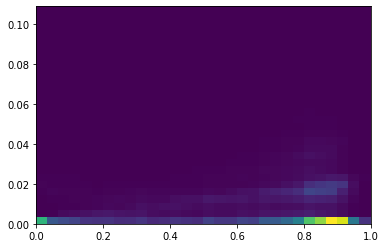

In [37]:
_ = plt.hist2d(df[fraction_cols[0]].values, abs_delta[:, 0], bins=(30, 30))

In [38]:
fractions = df[fraction_cols].values

In [40]:
(abs_delta > 0.05).sum(axis=0)

array([1429,  907, 3924, 5748, 5728, 1331, 1455, 1334, 1436,  728, 1399,
       1487,  763,  119,  124, 2817, 2393,  977, 6637, 2476, 2904,  844,
        976,  439,  372,  712,  158,  133,  203,  883])

In [46]:
np.any(abs_delta > 0.05, axis=1).sum()

20210

In [48]:
np.any(abs_delta > 0.1, axis=1).sum(), np.any(abs_delta > 0.1, axis=1).mean()

(12400, 0.05173240993762907)

In [49]:
1 - np.any(abs_delta > 0.1, axis=1).mean()

0.9482675900623709